In [1]:
import numpy as np
import pandas as pd
import random
import re

In [2]:
df = pd.read_csv("/content/drive/MyDrive/LINKEDINproject.csv",encoding='ISO-8859-1')
df

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time ú Associate,"1,001-5,000 employees ú IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time ú Associate,"1,001-5,000 employees ú IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time ú Mid-Senior level,"1,001-5,000 employees ú IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",NaN,Orion Innovation,Hybrid,Full-time ú Associate,"5,001-10,000 employees ú IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...,NaN
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",NaN,Uplers,On-site,Full-time ú Mid-Senior level,"1,001-5,000 employees ú IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...,NaN
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,On-site,Full-time ú Mid-Senior level,"10,001+ employees ú IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...,NaN
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",NaN,Uplers,Remote,Full-time ú Mid-Senior level,"1,001-5,000 employees ú IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...,NaN


In [3]:
df.shape

(7927, 16)

In [4]:
#for i in df['job'].unique():
    #print(i)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

In [6]:
list(df.columns)

['job_ID',
 'job',
 'location',
 'company_id',
 'company_name',
 'work_type',
 'full_time_remote',
 'no_of_employ',
 'no_of_application',
 'posted_day_ago',
 'alumni',
 'Hiring_person',
 'linkedin_followers',
 'hiring_person_link',
 'job_details',
 'Column1']

In [7]:
df.isnull().sum()

job_ID                   0
job                     33
location                33
company_id            7927
company_name            35
work_type              191
full_time_remote        79
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
hiring_person_link    2207
job_details             46
Column1               7927
dtype: int64

In [8]:
df.drop(columns=['job_ID'], inplace=True)

In [9]:
df.drop(columns=['company_id'], inplace=True)

In [10]:
df.drop(columns=['Column1'], inplace=True)

In [11]:
list(df.columns)

['job',
 'location',
 'company_name',
 'work_type',
 'full_time_remote',
 'no_of_employ',
 'no_of_application',
 'posted_day_ago',
 'alumni',
 'Hiring_person',
 'linkedin_followers',
 'hiring_person_link',
 'job_details']

In [12]:
df.shape

(7927, 13)

In [13]:
# using forward fill method to fill the null values

df['job'].fillna(method="ffill", inplace=True)

In [14]:
# Split the 'job' column by comma and select the first part as the job title
df['job_title'] = df['job'].str.split(',').str[0]



In [15]:
df.drop(columns=['job'], inplace=True)

In [16]:
# Get unique non-null values from the 'location' column
non_null_locations = df['location'].dropna().unique()

# Function to randomly fill null entries
def fill_null_locations(location):
    if pd.isna(location):
        return random.choice(non_null_locations)
    else:
        return location

# Apply the function to fill null entries in the 'location' column
df['location'] = df['location'].apply(fill_null_locations)



In [17]:
df['company_name'].fillna(method="ffill", inplace=True)

In [18]:
# to fill the work_type column

import random

work_types = ['Full-time', 'Part-time', 'Contract', 'Freelance', 'Internship']

def random_work_type():
    return random.choice(work_types)

df['work_type'].fillna(random_work_type(), inplace=True)

In [19]:
# In the column full time remote i have removed ú form the columns where ú in present

# Remove 'ú' from the 'full_time_remote' column
df['full_time_remote'] = df['full_time_remote'].str.replace('ú', '')


# Replace '1-10 employees' with NaN
df['full_time_remote'] = df['full_time_remote'].replace('1-10 employees', np.nan)

# Replace '1-10 employees' with NaN
df['full_time_remote'] = df['full_time_remote'].replace('11-50 employees', np.nan)




In [20]:
# Values to fill null entries with
fill_values = ['part-time internship', 'part-time associate','full-time internship','full-time junior']

# Fill null entries with specific values
df['full_time_remote'].fillna(pd.Series(fill_values * (len(df) // len(fill_values))), inplace=True)


In [21]:
df['full_time_remote'].unique

<bound method Series.unique of 0              Full-time  Associate
1              Full-time  Associate
2       Full-time  Mid-Senior level
3                         Full-time
4                         Full-time
                   ...             
7922           Full-time  Associate
7923    Full-time  Mid-Senior level
7924    Full-time  Mid-Senior level
7925    Full-time  Mid-Senior level
7926    Full-time  Mid-Senior level
Name: full_time_remote, Length: 7927, dtype: object>

In [22]:
df.isnull().sum()

location                 0
company_name             0
work_type                0
full_time_remote         0
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
hiring_person_link    2207
job_details             46
job_title                0
dtype: int64

In [23]:
df['no_of_employ'].unique

<bound method Series.unique of 0       1,001-5,000 employees ú IT Services and IT Con...
1       1,001-5,000 employees ú IT Services and IT Con...
2       1,001-5,000 employees ú IT Services and IT Con...
3                                          1-10 employees
4                                          1-10 employees
                              ...                        
7922    5,001-10,000 employees ú IT Services and IT Co...
7923    1,001-5,000 employees ú IT Services and IT Con...
7924    10,001+ employees ú IT Services and IT Consulting
7925    1,001-5,000 employees ú IT Services and IT Con...
7926    10,001+ employees ú IT Services and IT Consulting
Name: no_of_employ, Length: 7927, dtype: object>

In [24]:
#cleaning no_of_employ column

# Extract the "1,001-5,000" part using regular expressions
df['no_of_employ'] = df['no_of_employ'].str.extract(r'(\d+,\d+\s*-\s*\d+,\d+)')
# The regular expression \d+,\d+\s*-\s*\d+,\d+ matches a pattern like "1,001-5,000"


df['no_of_employ'].fillna(method="ffill", inplace=True)


In [25]:
# Values to remove
values_to_remove = ['day', 'days', 'hour', 'hours', 'minute', 'minutes', 'second', 'seconds']

# Filter rows where 'no_of_application' is not in values_to_remove
df[~df['no_of_application'].isin(values_to_remove)]


,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,job_title
0,"Delhi, Delhi, India",Crossover,Remote,Full-time Associate,"1,001-5,000",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,Data Analyst
1,"New Delhi, Delhi, India",Crossover,Remote,Full-time Associate,"1,001-5,000",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,Data Analyst
2,Greater Bengaluru Area,Uplers,Remote,Full-time Mid-Senior level,"1,001-5,000",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,Data Analyst - WFH
3,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,"1,001-5,000",200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,Data Analyst
4,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,"1,001-5,000",8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,"Kochi, Kerala, India",Orion Innovation,Hybrid,Full-time Associate,"5,001-10,000",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...,Back End Developer
7923,"Gurugram, Haryana, India",Uplers,On-site,Full-time Mid-Senior level,"1,001-5,000",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...,Software Engineer - Senior
7924,"Hyderabad, Telangana, India",Tata Consultancy Services,On-site,Full-time Mid-Senior level,"1,001-5,000",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...,Vue JS
7925,"Bengaluru, Karnataka, India",Uplers,Remote,Full-time Mid-Senior level,"1,001-5,000",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...,iOS Developer


In [26]:
df['no_of_application'].fillna(method='ffill', inplace=True)  # Forward fill

In [27]:
df['posted_day_ago'].fillna(method='ffill', inplace=True)  # Forward fill

In [28]:
# method to remove company alumni name

string_to_remove = 'company alumni'
df['alumni'] = df['alumni'].str.replace(string_to_remove, '')


df['alumni'].fillna(method='ffill', inplace=True)  # forward fill

In [29]:
df['Hiring_person'].unique

<bound method Series.unique of 0                          NaN
1                          NaN
2                 Shahid Ahmad
3                Vartika Singh
4       Manisha (Gisele Smith)
                 ...          
7922      Poornima Viswanathan
7923             Tejveer Singh
7924              ANNIE ANTONY
7925               Arjun Jaggi
7926                       NaN
Name: Hiring_person, Length: 7927, dtype: object>

In [30]:
!pip install faker

from faker import Faker

fake = Faker('en_IN')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:00


In [31]:
# Identify the rows with null values in the "Hiring_person" column
null_rows = df['Hiring_person'].isnull()

# Generate fake Indian names for the null values
indian_names = [fake.name() for _ in range(sum(null_rows))]

# Replace the null values with the generated names
df.loc[null_rows, 'Hiring_person'] = indian_names

In [32]:
string_to_remove = 'followers'
df['linkedin_followers'] = df['linkedin_followers'].str.replace(string_to_remove, '')

# Remove commas from the 'linkedin_followers' column using str.replace()
df['linkedin_followers'] = df['linkedin_followers'].str.replace(',', '')



In [33]:
# Convert the 'linkedin_followers' column to numeric
df['linkedin_followers'] = pd.to_numeric(df['linkedin_followers'], errors='coerce')

In [34]:
df['linkedin_followers'].fillna(method='ffill', inplace=True)

In [35]:
list(df.columns)

['location',
 'company_name',
 'work_type',
 'full_time_remote',
 'no_of_employ',
 'no_of_application',
 'posted_day_ago',
 'alumni',
 'Hiring_person',
 'linkedin_followers',
 'hiring_person_link',
 'job_details',
 'job_title']

In [36]:
# Define the possible experience levels
experience_levels = ['Entry-Level', 'Mid-Level', 'Senior-Level','Associate','Specialist']

# Create a new column 'experience_level' with random values
df['experience_level'] = [random.choice(experience_levels) for _ in range(len(df))]


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
company_counts = df['company_name'].value_counts().head(10)
company_counts

EPAM Anywhere                1519
Tata Consultancy Services     381
Uplers                        297
Crossover                     133
Virtusa                        93
Applicantz                     77
LTIMindtree                    75
Mobile Programming LLC         63
Tech Mahindra                  47
OptimHire                      40
Name: company_name, dtype: int64

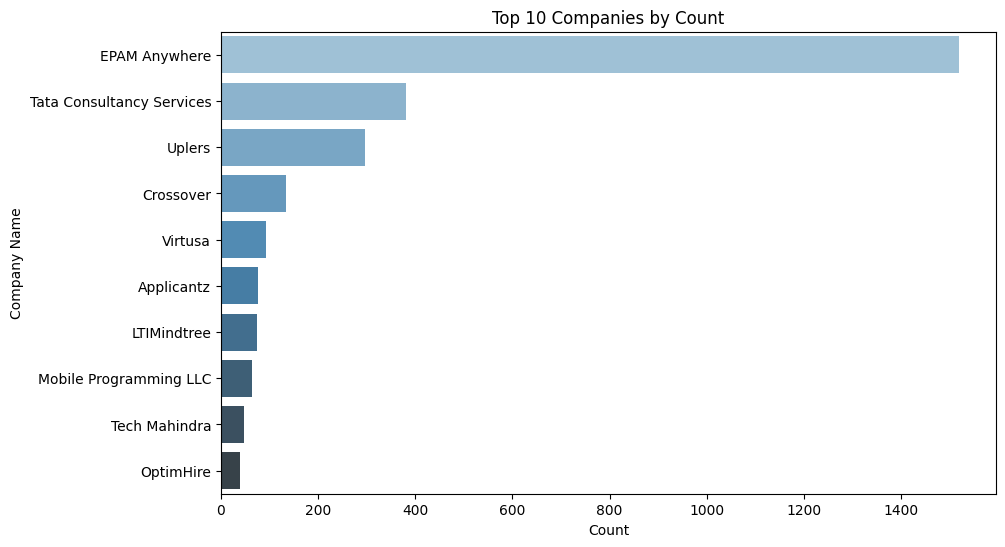

In [39]:
# Count the occurrences of each company name and select the top 10
company_counts = df['company_name'].value_counts().head(10)

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.values, y=company_counts.index, palette="Blues_d")

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.title('Top 10 Companies by Count')

# Show the plot
plt.show()

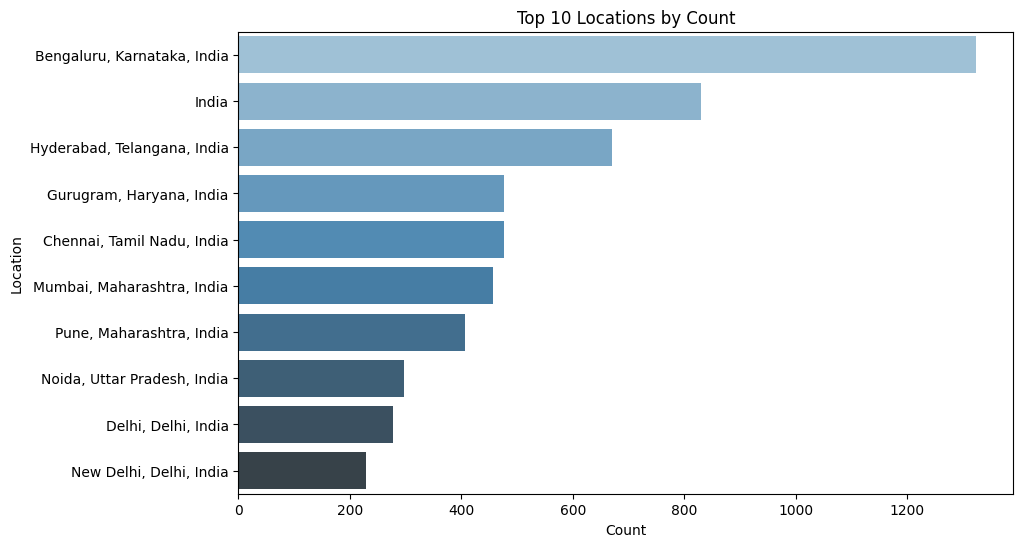

In [40]:
# Count the occurrences of each location and select the top 10
location_counts = df['location'].value_counts().sort_values(ascending = False).head(10)

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette="Blues_d")

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 10 Locations by Count')

# Show the plot
plt.show()

In [41]:
df.drop(df[df['location'] == "India"].index, inplace=True)


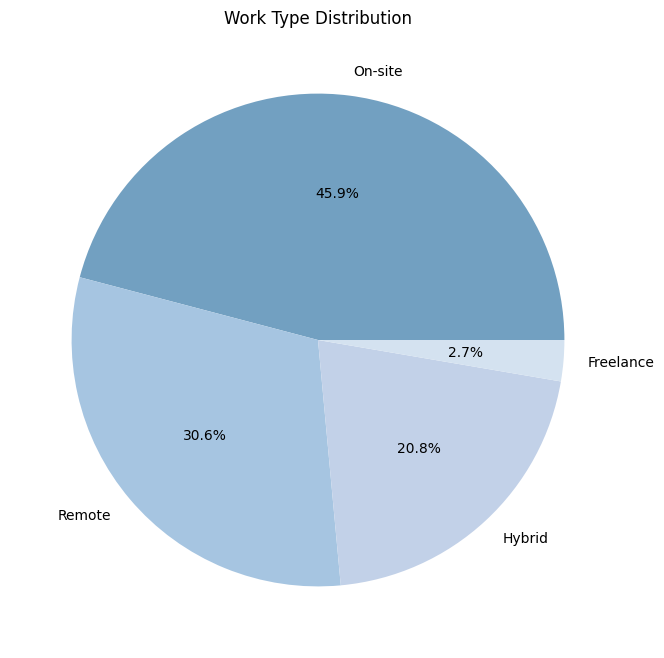

In [42]:
# Count the occurrences of each work type
work_type_counts = df['work_type'].value_counts()

# Define shades of light blue
shades_of_light_blue = ["#72A0C1", "#A6C5E1", "#C2D1E8", "#D4E2F0", "#E6F3F9", "#F5FBFF"]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', colors=shades_of_light_blue)

# Add a title
plt.title('Work Type Distribution')

# Show the plot
plt.show()

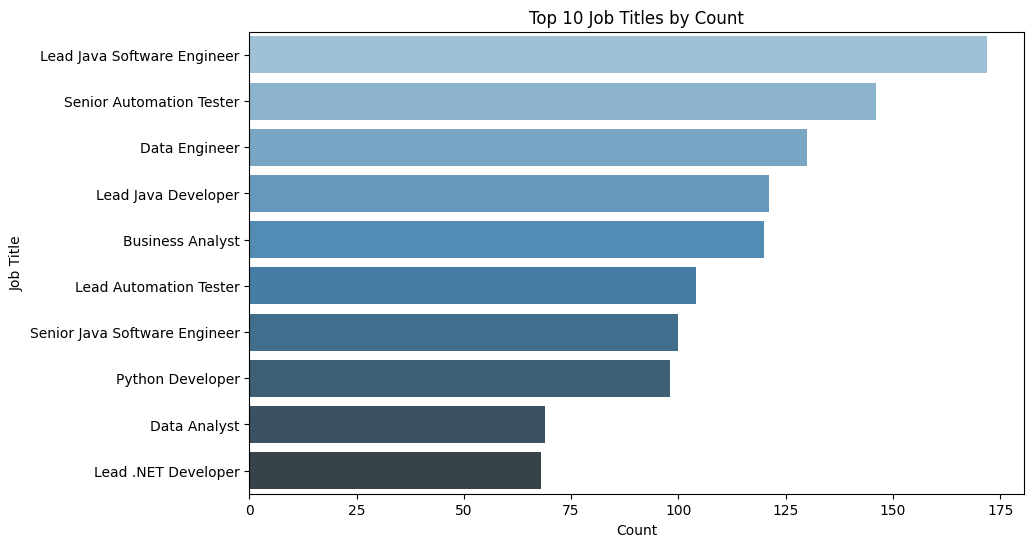

In [43]:
# Count the occurrences of each job title and select the top 10
job_counts = df['job_title'].value_counts().head(10)

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.values, y=job_counts.index, palette="Blues_d")

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles by Count')

# Show the plot
plt.show()

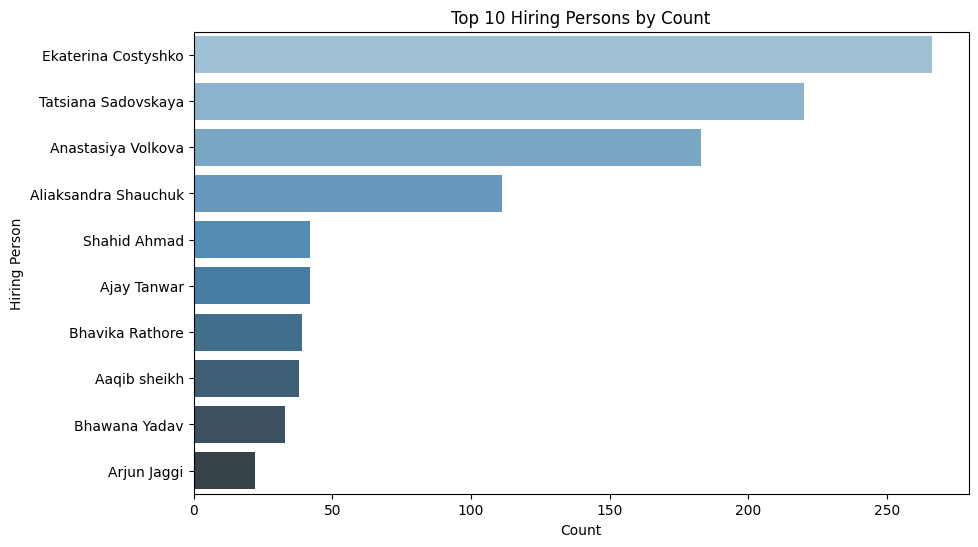

In [44]:
# Count the occurrences of each hiring person and select the top 10
hiring_person_counts = df['Hiring_person'].value_counts().head(10)

# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=hiring_person_counts.values, y=hiring_person_counts.index, palette="Blues_d")

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Hiring Person')
plt.title('Top 10 Hiring Persons by Count')

# Show the plot
plt.show()


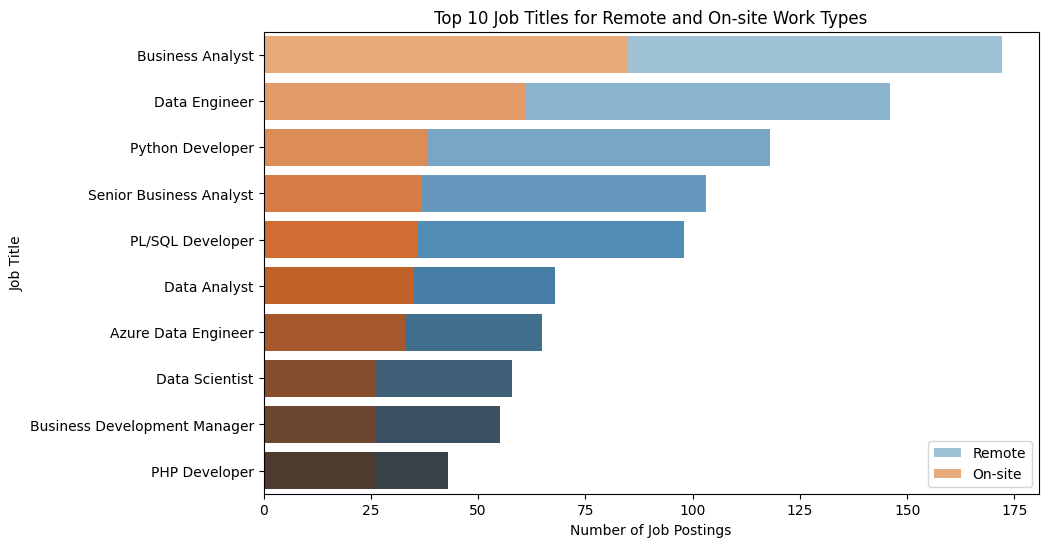

In [45]:
# Filter data for 'Remote' and 'On-site' work types
top_jobs_remote = df[df['work_type'] == 'Remote']['job_title'].value_counts().head(10)
top_jobs_onsite = df[df['work_type'] == 'On-site']['job_title'].value_counts().head(10)

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create barplots for 'Remote' and 'On-site' job titles
sns.barplot(x=top_jobs_remote.values, y=top_jobs_remote.index, ax=ax, palette="Blues_d", label='Remote')
sns.barplot(x=top_jobs_onsite.values, y=top_jobs_onsite.index, ax=ax, palette="Oranges_d", label='On-site')

# Customize the plot
ax.set_title('Top 10 Job Titles for Remote and On-site Work Types')
ax.set_xlabel('Number of Job Postings')
ax.set_ylabel('Job Title')
ax.legend()

# Show the plot
plt.show()

In [51]:
df.to_csv('/content/linkedin.csv', index=False)

In [47]:
!pip install pyspark

from pyspark.sql import SparkSession

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=2b54a9fbac178edc72ced87999c092958cb291479aa2a780151ec55f68f9bbd3
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [48]:
spark = SparkSession.builder.appName("MySparkSession").getOrCreate()

In [53]:
df = spark.read.csv("/content/linkedin.csv", header=True, inferSchema=True)

In [54]:
df.createOrReplaceTempView("linkedin_table")

In [58]:
list[df.columns]

list[['location', 'company_name', 'work_type', 'full_time_remote', 'no_of_employ', 'no_of_application', 'posted_day_ago', 'alumni', 'Hiring_person', 'linkedin_followers', 'hiring_person_link', 'job_details', 'job_title', 'experience_level']]

In [59]:
spark.sql("""
SELECT job_title, COUNT(*) AS job_count
FROM linkedin_table
GROUP BY job_title
ORDER BY job_count DESC
LIMIT 10;
""").show()



+--------------------+---------+
|           job_title|job_count|
+--------------------+---------+
|Lead Java Softwar...|      166|
|Senior Automation...|      146|
|       Data Engineer|      128|
| Lead Java Developer|      120|
|    Business Analyst|      114|
|Lead Automation T...|      104|
|Senior Java Softw...|      100|
|    Python Developer|       98|
|        Data Analyst|       69|
| Lead .NET Developer|       67|
+--------------------+---------+



In [56]:
spark.sql("""
SELECT location, COUNT(*) AS location_count
FROM linkedin_table
GROUP BY location
ORDER BY location_count DESC
LIMIT 10;""").show()

+--------------------+--------------+
|            location|location_count|
+--------------------+--------------+
|Bengaluru, Karnat...|          1324|
|Hyderabad, Telang...|           671|
|Chennai, Tamil Na...|           477|
|Gurugram, Haryana...|           477|
|Mumbai, Maharasht...|           457|
|Pune, Maharashtra...|           406|
|Noida, Uttar Prad...|           297|
| Delhi, Delhi, India|           277|
|New Delhi, Delhi,...|           228|
|Kanpur, Uttar Pra...|           186|
+--------------------+--------------+



In [60]:
spark.sql("""
SELECT company_name, experience_level, COUNT(*) AS count
FROM linkedin_table
GROUP BY company_name, experience_level;""").show()

+--------------------+----------------+-----+
|        company_name|experience_level|count|
+--------------------+----------------+-----+
|         LTIMindtree|       Associate|   21|
|Param Consulting ...|       Mid-Level|    1|
|         MenteeChain|       Associate|    1|
|    Sourcing X-Press|    Senior-Level|    1|
|  WebPlanex Infotech|     Entry-Level|    1|
|Lakhera Global Se...|       Mid-Level|    1|
|         ALTEN India|       Mid-Level|    1|
|             CITRIOT|     Entry-Level|    1|
|Deutsche Telekom ...|     Entry-Level|    1|
|       Infometry Inc|    Senior-Level|    1|
|K.R. Mangalam Uni...|      Specialist|    1|
|             Fractal|       Associate|    3|
|              Esmito|       Associate|    1|
|     United & United|     Entry-Level|    1|
|JetSynthesys Pvt....|       Associate|    2|
|         Efkon India|Business Analyst|    3|
|    Supro Consulting|       Associate|    1|
|           NielsenIQ|       Associate|    1|
|            Pixelfox|     Entry-L

In [62]:
spark.sql("""
SELECT job_title, work_type, COUNT(*) AS count
FROM linkedin_table
GROUP BY job_title, work_type;""").show()

+--------------------+---------+-----+
|           job_title|work_type|count|
+--------------------+---------+-----+
|Cloud Support Eng...|   Remote|    5|
|    GCP Data Enginer|   Hybrid|    3|
|       OIM Developer|   Remote|    1|
|              Spring|   Remote|    1|
|Lead Computer Vis...|  On-site|    1|
|Salesforce Developer|   Hybrid|   18|
| Azure Data Engineer|   Hybrid|   15|
|Senior Game Devel...|  On-site|    1|
|        BASIS SOLMAN|  On-site|    2|
|   Bigdata Developer|   Remote|    4|
|Business Developm...|  On-site|    1|
|Cloud Software En...|   Remote|    7|
|Data Analytics As...|  On-site|    1|
|Digital Marketing...|   Hybrid|    3|
|Algorithm Develop...|  On-site|    1|
|Azure Devops Engi...|   Hybrid|    1|
|   Financial Analyst|  On-site|    4|
|Broadcast IT Engi...|  On-site|    1|
|   Shopify Developer|   Hybrid|    4|
|Open Position for...|   Hybrid|    3|
+--------------------+---------+-----+
only showing top 20 rows



In [63]:
spark.sql("""SELECT full_time_remote, COUNT(*) AS count
FROM linkedin_table
GROUP BY full_time_remote;""").show()

+--------------------+-----+
|    full_time_remote|count|
+--------------------+-----+
|Full-time  Entry ...|  150|
| part-time associate|   22|
|           Part-time|   25|
| Contract  Associate|   14|
|Full-time  Executive|   49|
|           Associate|    2|
|Contract  Entry l...|   12|
|full-time internship|   18|
|Internship  Entry...|    2|
|            Contract|   67|
|Full-time  Mid-Se...| 3564|
|Full-time  Associate|  545|
|    full-time junior|   15|
|Internship  Inter...|    5|
|Contract  Mid-Sen...|   63|
| Full-time  Director|   30|
|           Full-time| 2421|
|part-time internship|   21|
|          Internship|   67|
|           Temporary|    2|
+--------------------+-----+
only showing top 20 rows



In [65]:
spark.sql("""
select job_title,location
from linkedin_table
order by location desc limit 10;""").show()

+--------------------+--------------------+
|           job_title|            location|
+--------------------+--------------------+
|Corporate Sales /...|West Delhi, Delhi...|
|Python Developer ...|West Delhi, Delhi...|
|Business Developm...|West Delhi, Delhi...|
|    Sales Specialist|West Delhi, Delhi...|
|    Python Developer|Vishakhapatnam, A...|
|Sap Finance Contr...|Vishakhapatnam, A...|
|    Python Developer|Vishakhapatnam, A...|
|SAP Production Pl...|Vishakhapatnam, A...|
|    Python Developer|Vishakhapatnam, A...|
|    Python Developer|Vishakhapatnam, A...|
+--------------------+--------------------+

